# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1042]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline display of visuals
%matplotlib inline

# suppress all warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [1043]:
# read the data
df = pd.read_csv('foodhub_order.csv')

# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [1044]:
#Unpack the column names in variables to ensure the names are dynamic and mitigate the risk of typing errors
#---------------------------------------------------------------
(
    order_id, customer_id
    , restaurant_name
    , cuisine_type
    , cost_of_the_order
    , day_of_the_week
    , rating
    , food_preparation_time
    , delivery_time
) = df.columns
#---------------------------------------------------------------

### **Question 1:** How many rows and columns are present in the data?

In [1045]:
# Write your code here
shape = df.shape #returns the number of rows and columns in the DataFrame
print(f"The FoodHub dataset has {shape[0]:,.0f} rows and {shape[1]:,.0f} columns.")

The FoodHub dataset has 1,898 rows and 9 columns.


#### Observations:
The FoodHub dataset has **1,898** rows and **9** columns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [1046]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* There are **9 columns** in the dataset.
* There is **1 float data type column** - cost_of_the_order.
* There are **4 integer data types** (**'order_id', 'customer_id', 'food_preparation_time', 'delivery_time'**). 
'order_id' and 'customer_id' columns, although are represented as integer types, are not integers, but categorical variables. Performing any arithmetical operations on them are meaningless.
* There are **4 object data types.** (**'restaurant_name', 'cuisine_type', 'day_of_the_week' and 'rating'**). Surprisingly, rating should be an integer data type since it is a discrete variable with values ranging from 1 to 5. This would offer the benefit of calculating the 'mean rating' in order to obtain useful insights.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [1047]:
# Write your code here
print(df.isnull().values.any()) #check for the presence of missing data in the dataframe

# check for missing data per column
df_copy = df.copy() # create a copy of the dataframe before checking and replacing missing data
for _ in df_copy.columns: # iterate over the columns of the dataframe
    pass
    print(f"{df_copy[_].value_counts(normalize=True) * 100}") # output the value count to explore the unique value count of columns
    print("-" * 50) # visual line seperator of each column

#There are missing values ('Not given') in the rating column - About ~38%
df_copy[rating].replace("Not given", np.nan, inplace=True) #Replace them with NaN
df_copy[rating] = df_copy[rating].astype(np.float64) # convert 'rating' column to float in order to perform treatment of missing value

# replace the NaN values with the minimum rating values grouped by cuisine_type
sel_cols = [cuisine_type] #selected columns for grouping

#Go with the lowest rating for missing values
df_copy[rating] = df_copy[rating].fillna(value=df_copy.groupby(sel_cols)[rating].transform("min"))

df_copy[rating] = df_copy[rating].astype(np.int64) #convert 'rating' column to integer

print("The rating category after replacing missing data")
df_copy[rating].value_counts(dropna=False, normalize=True) # check to confirm all missing values are replaced

False
order_id
1477147    0.052687
1477697    0.052687
1477555    0.052687
1478028    0.052687
1478308    0.052687
             ...   
1478087    0.052687
1476775    0.052687
1478421    0.052687
1476774    0.052687
1478056    0.052687
Name: proportion, Length: 1898, dtype: float64
--------------------------------------------------
customer_id
52832     0.684932
47440     0.526870
83287     0.474183
250494    0.421496
259341    0.368809
            ...   
385426    0.052687
254913    0.052687
289597    0.052687
74412     0.052687
397537    0.052687
Name: proportion, Length: 1200, dtype: float64
--------------------------------------------------
restaurant_name
Shake Shack                  11.538462
The Meatball Shop             6.954689
Blue Ribbon Sushi             6.269758
Blue Ribbon Fried Chicken     5.057956
Parm                          3.582719
                               ...    
Sushi Choshi                  0.052687
Dos Caminos Soho              0.052687
La Follia           

rating
3    0.478398
5    0.309800
4    0.211802
Name: proportion, dtype: float64

#### Observations:
* A quick scan through the entire dataset showed there are no missing values.
* However, rating column showed missing values represented by 'Not given'.
* Approximately ~38% of 'rating' were returned as 'Not given'. This indicated the presence of missing data.
* This must have accounted for the reason the 'rating' column was returned as 'object' data type instead of integer.
* The missing 'rating' were replaced with the minimum rating per 'cuisine_type'. The minimum was chosen as a conservative estimate. This is because a highly satisfied customer is more likely to provide a feedback than not.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [1048]:
# Write your code here

df[food_preparation_time].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

#### Observations:
* It takes a minimum of **20 minutes**, an average of **~27 minutes** and a maximum of **35 minutes**  to prepare the food once order is placed.

### **Question 5:** How many orders are not rated?

In [1049]:
# Write the code here
df[df[rating] == "Not given"][rating].count()

736

#### Observations:
**736** orders were not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

In [1050]:
#Summary statistics of variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0


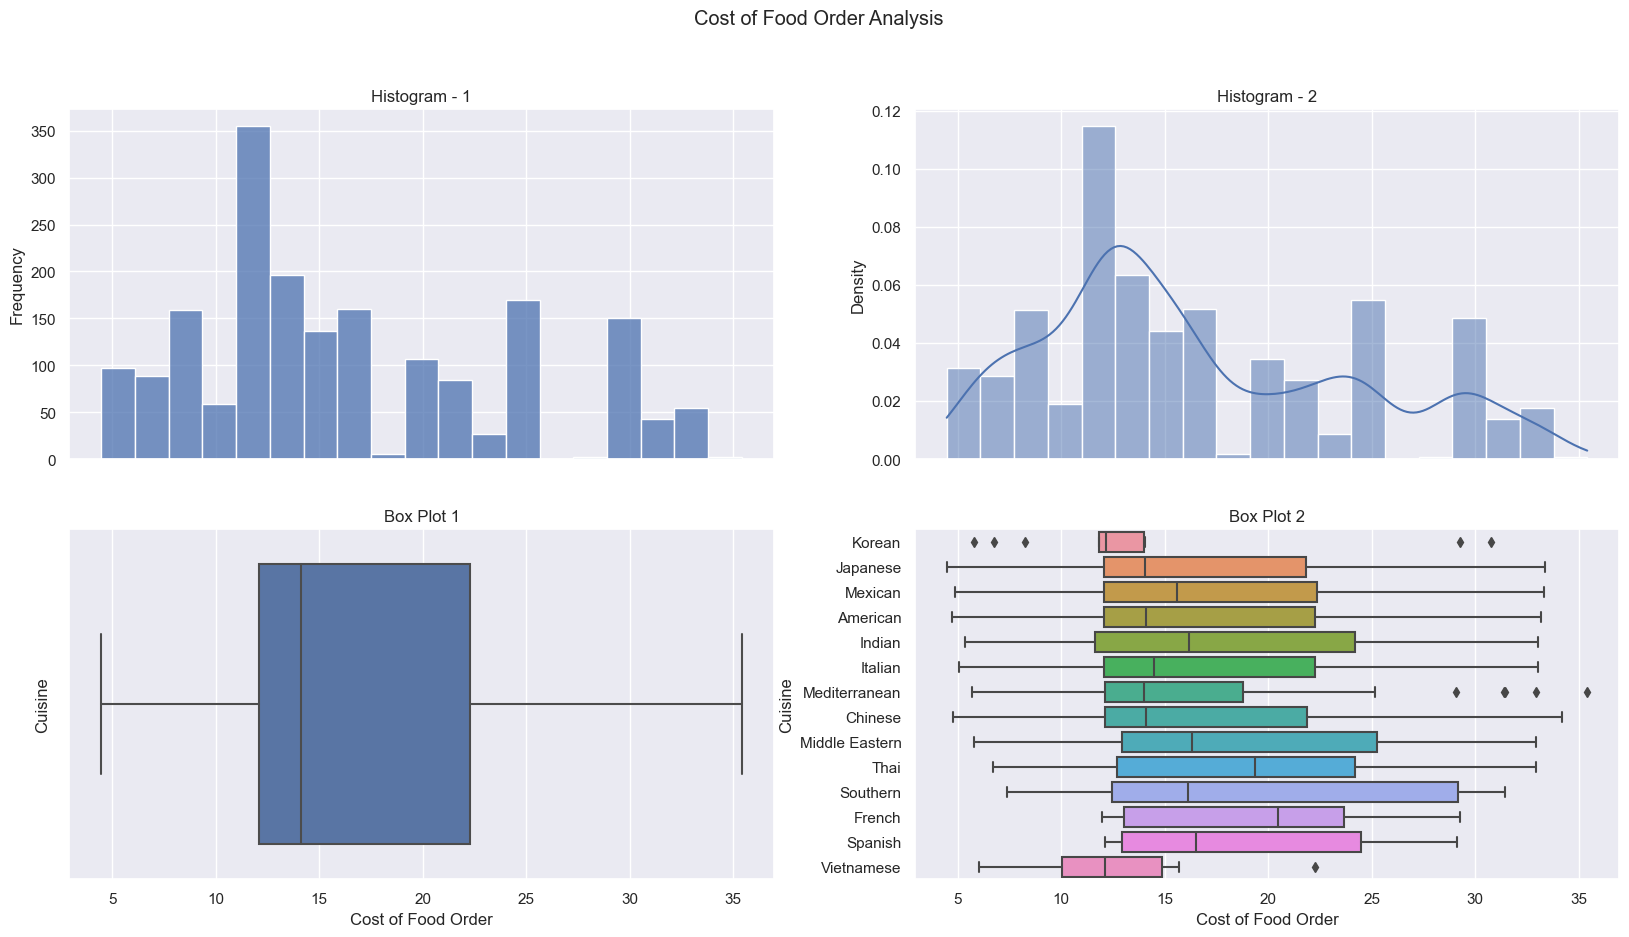

In [1051]:
# Univariate Analysis of cost_of_order

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,10)) #Set the figure and plots
title = "Cost of Food Order Analysis"
fig.suptitle(title)

x=cost_of_the_order

#---- Histogram---------------
ax_title = "Histogram - 1"
x_label = "Cost of Food Order"
y_label = "Frequency"

sns.histplot(data=df, x=x, kde=False, ax=ax1)
ax1.set_title(ax_title)
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label);

y_label = "Density"
sns.histplot(data=df, x=x, stat="density", kde=True, ax=ax2)
ax2.set_title("Histogram - 2")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label);

# --- Box Plots------------------------------
ax_title = "Box Plot 1"
y_label = "Cuisine"
sns.boxplot(data=df,x=x, ax=ax3);
ax3.set_title(ax_title)
ax3.set_xlabel(x_label)
ax3.set_ylabel(y_label);

sns.boxplot(data=df,x=x, y=cuisine_type, ax=ax4);
ax4.set_title("Box Plot 2")
ax4.set_xlabel(x_label)
ax4.set_ylabel(y_label);

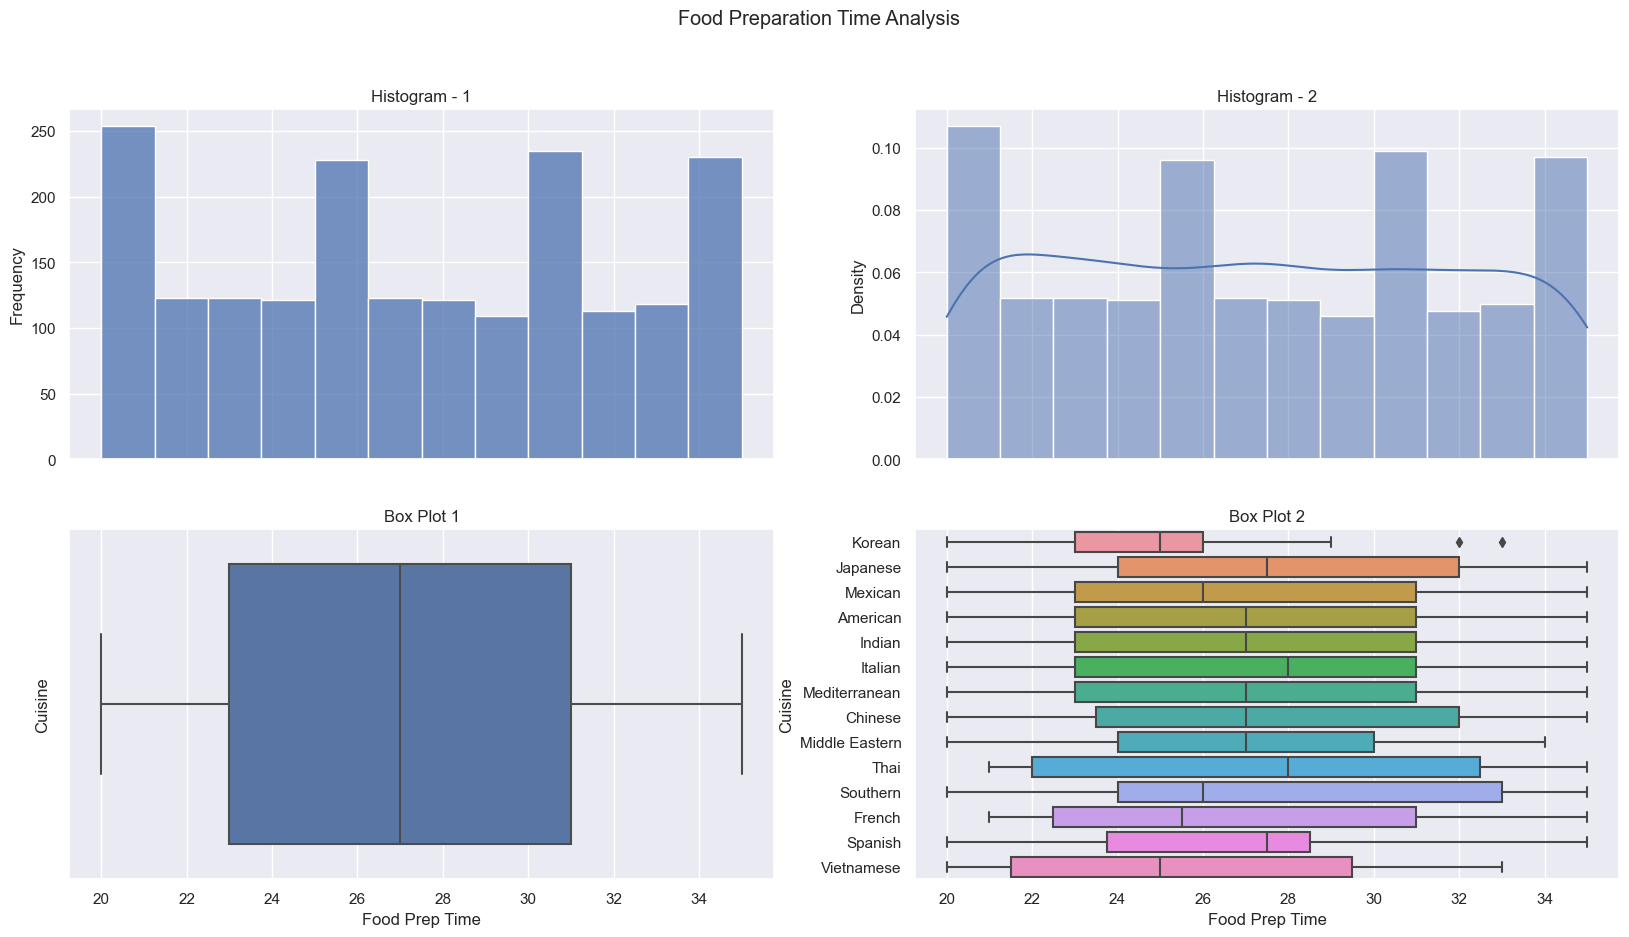

In [1052]:
# Univariate Analysis of Food_Preparation_Time

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,10)) #Set the figure and plots
title = "Food Preparation Time Analysis"
fig.suptitle(title)

x=food_preparation_time

#---- Histogram---------------
ax_title = "Histogram - 1"
x_label = "Food Prep Time"
y_label = "Frequency"

sns.histplot(data=df, x=x, kde=False, ax=ax1)
ax1.set_title(ax_title)
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label);

y_label = "Density"
sns.histplot(data=df, x=x, stat="density", kde=True, ax=ax2)
ax2.set_title("Histogram - 2")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label);

# --- Box Plots------------------------------
ax_title = "Box Plot 1"
y_label = "Cuisine"
sns.boxplot(data=df,x=x, ax=ax3);
ax3.set_title(ax_title)
ax3.set_xlabel(x_label)
ax3.set_ylabel(y_label);

sns.boxplot(data=df,x=x, y=cuisine_type, ax=ax4);
ax4.set_title("Box Plot 2")
ax4.set_xlabel(x_label)
ax4.set_ylabel(y_label);

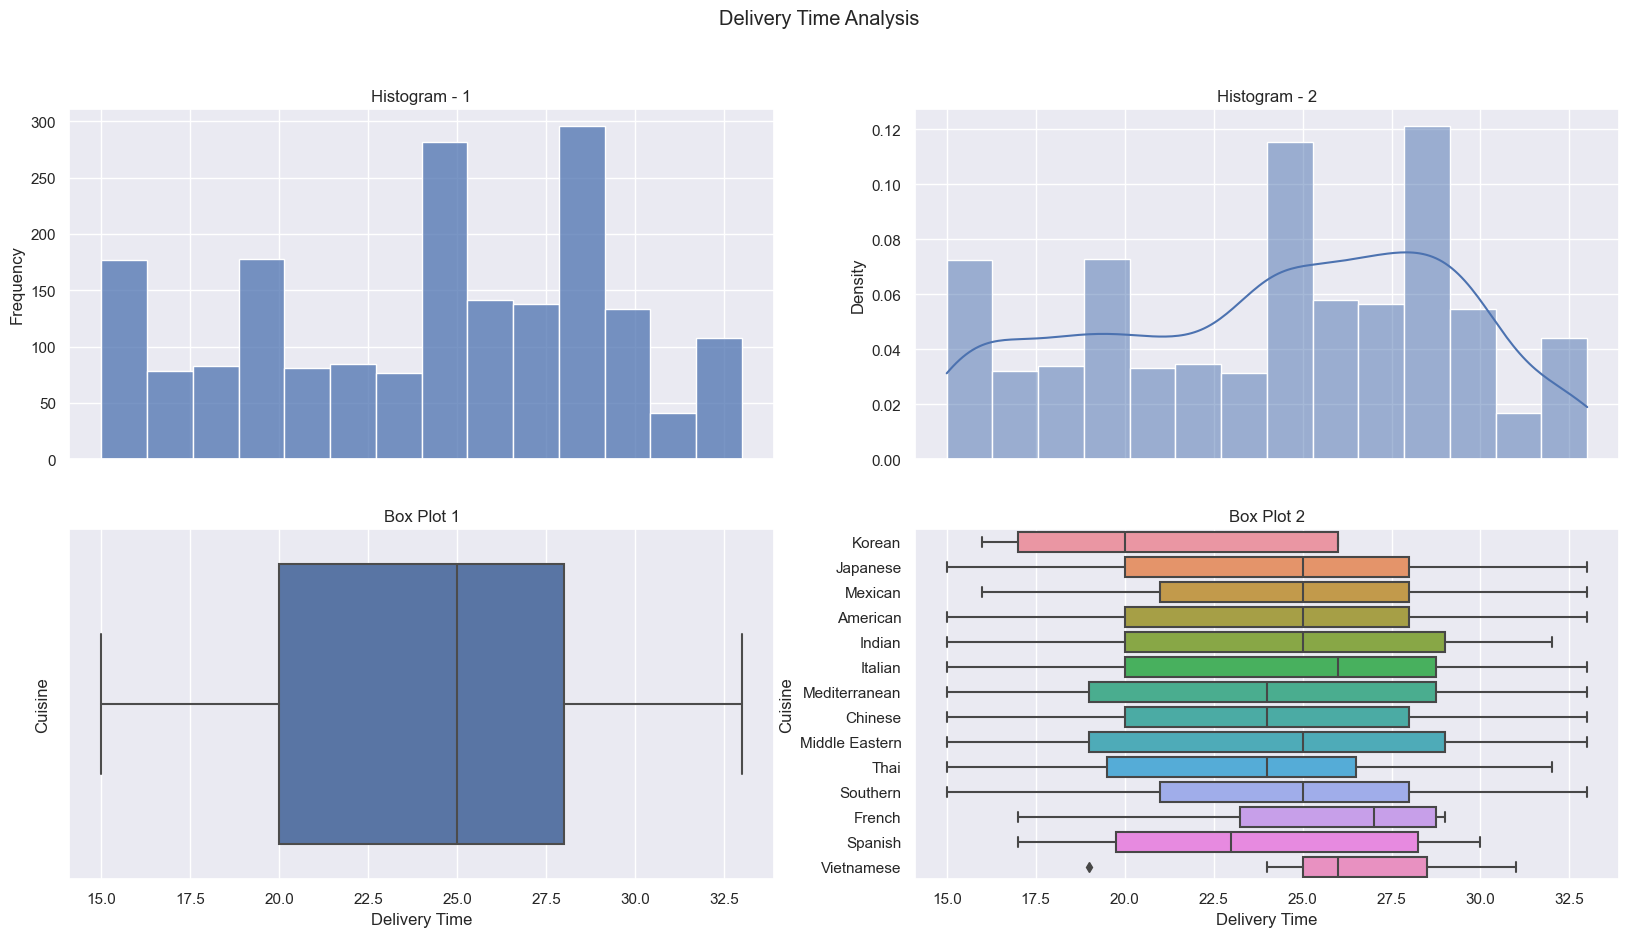

In [1053]:
# Univariate Analysis of Delivery Time

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(20,10)) #Set the figure and plots
title = "Delivery Time Analysis"
fig.suptitle(title)

x=delivery_time

#---- Histogram---------------
ax_title = "Histogram - 1"
x_label = "Delivery Time"
y_label = "Frequency"

sns.histplot(data=df, x=x, kde=False, ax=ax1)
ax1.set_title(ax_title)
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label);

y_label = "Density"
sns.histplot(data=df, x=x, stat="density", kde=True, ax=ax2)
ax2.set_title("Histogram - 2")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label);

# --- Box Plots------------------------------
ax_title = "Box Plot 1"
y_label = "Cuisine"
sns.boxplot(data=df,x=x, ax=ax3);
ax3.set_title(ax_title)
ax3.set_xlabel(x_label)
ax3.set_ylabel(y_label);

sns.boxplot(data=df,x=x, y=cuisine_type, ax=ax4);
ax4.set_title("Box Plot 2")
ax4.set_xlabel(x_label)
ax4.set_ylabel(y_label);

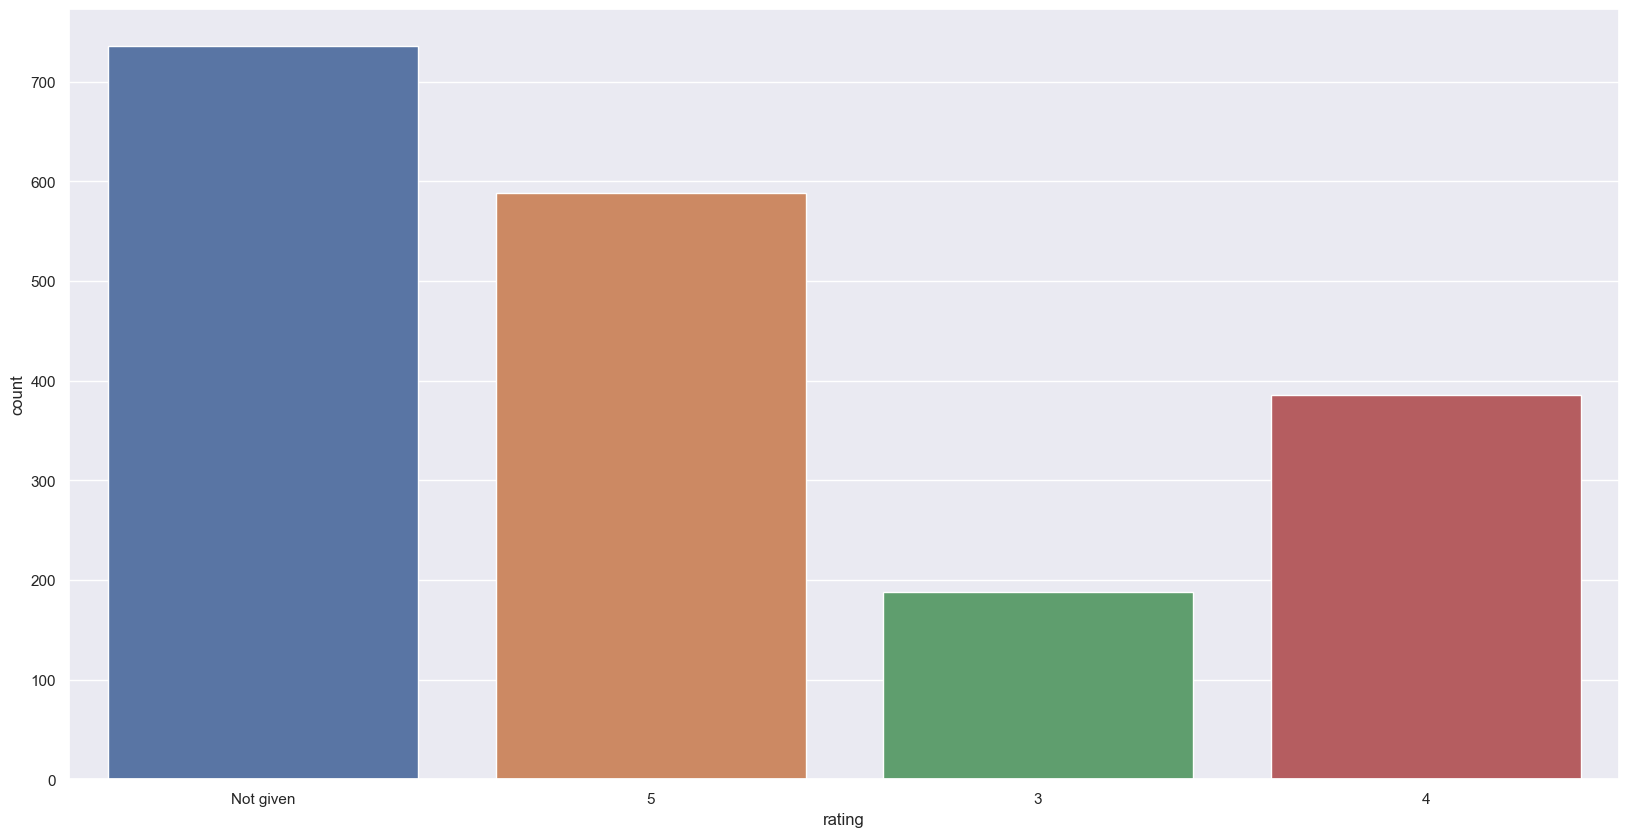

In [1054]:
# Univariate Analysis of Categorical variable - rating
fig, ax1 = plt.subplots(figsize=(20,10))
x = rating

sns.countplot(data=df, x=x, ax=ax1);

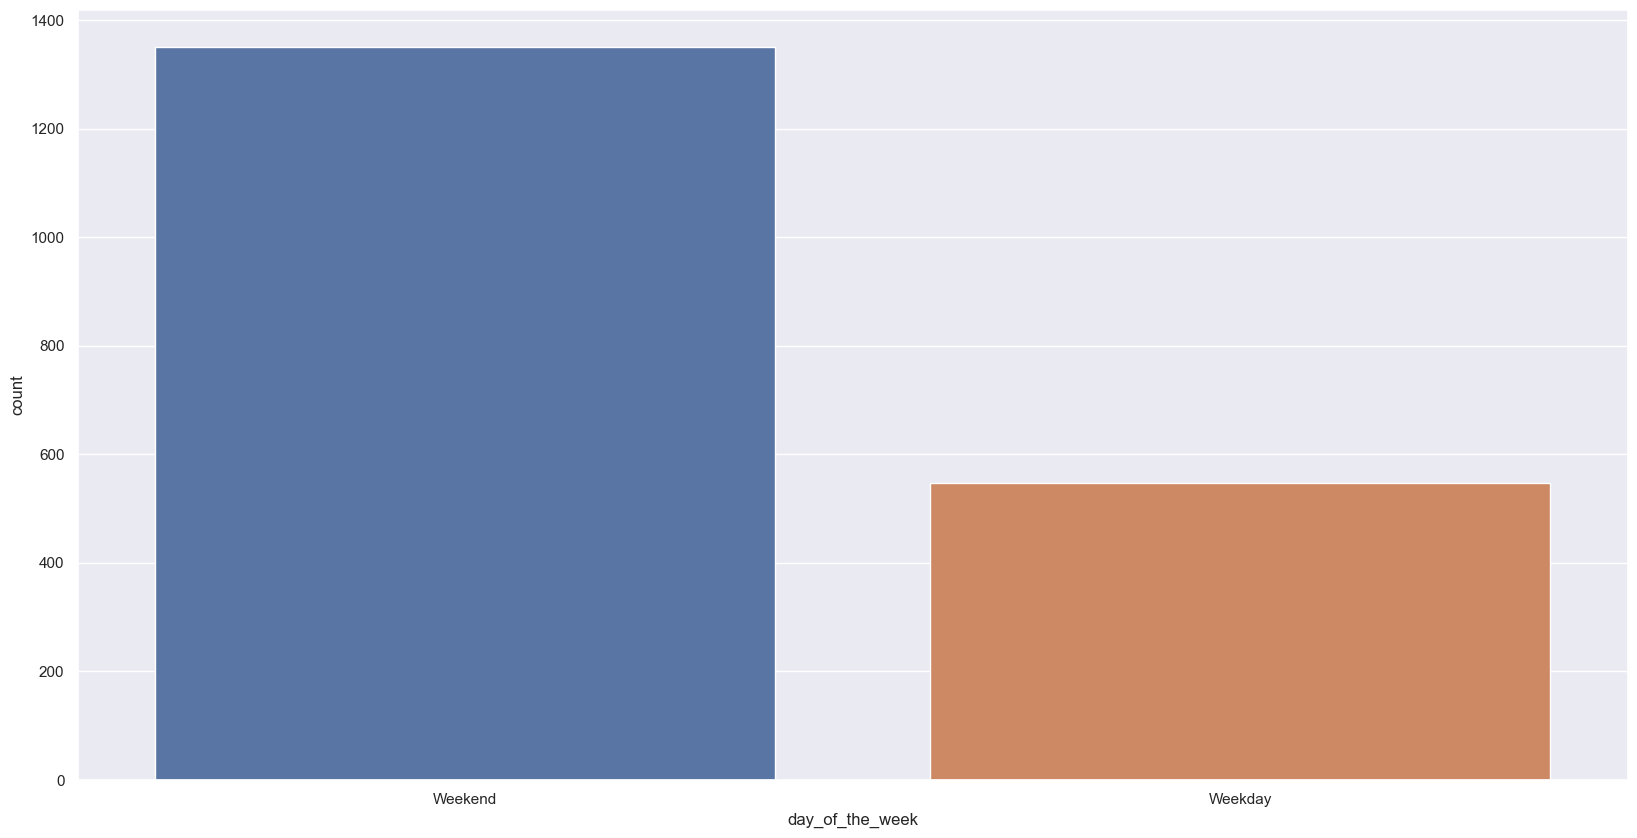

In [1055]:
# Univariate Analysis of Categorical variable - day_of_the_week
fig, ax1 = plt.subplots(figsize=(20,10))
x = day_of_the_week

sns.countplot(data=df, x=x, ax=ax1);

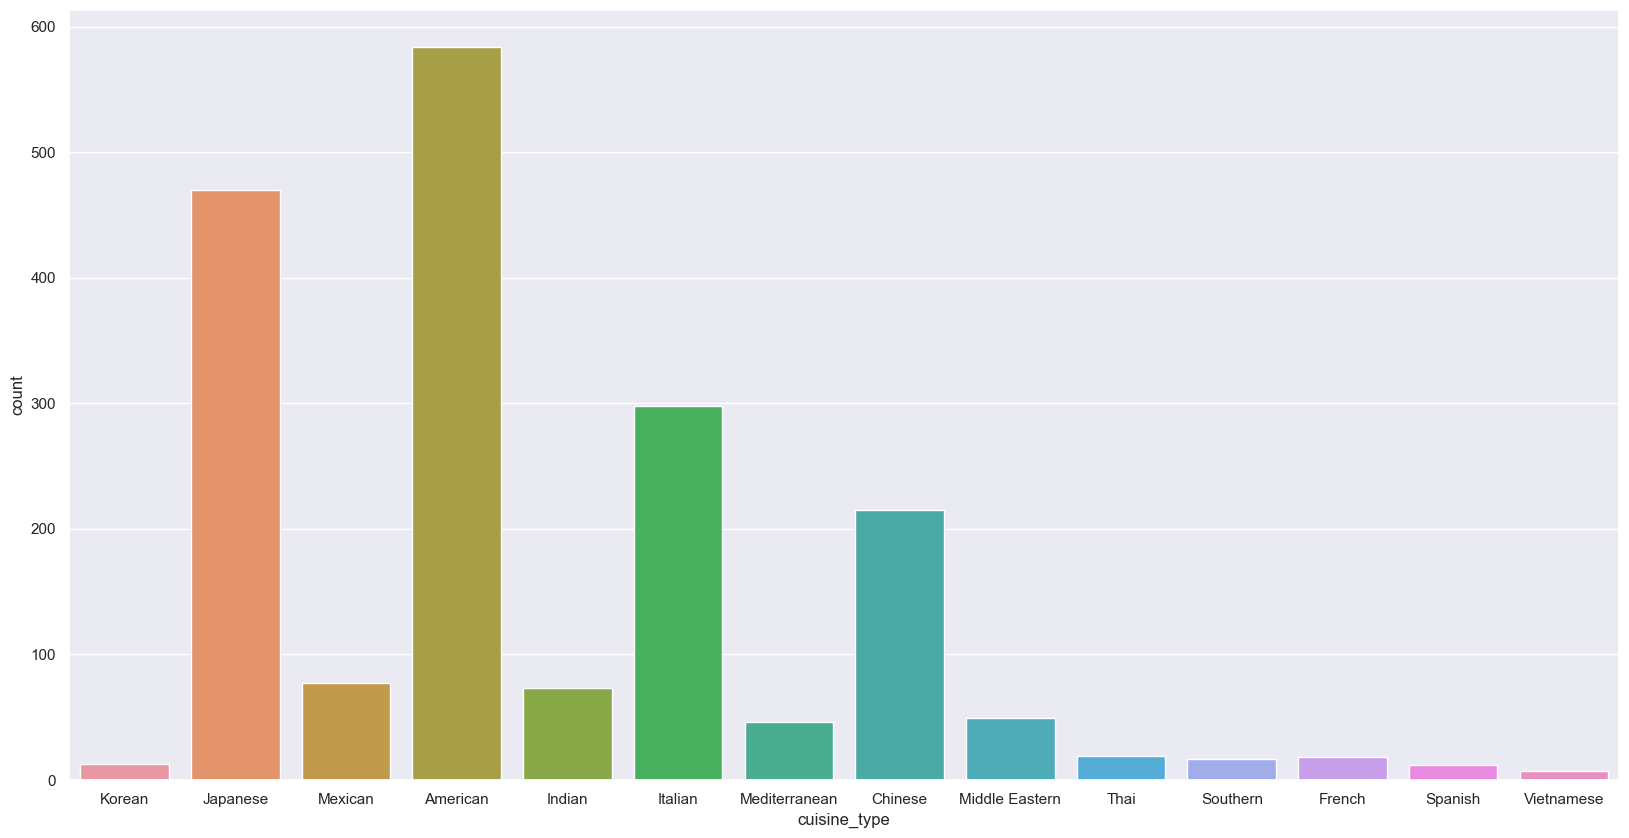

In [1056]:
# Univariate Analysis of Categorical variable - cuisine_type
fig, ax1 = plt.subplots(figsize=(20,10))
x = cuisine_type

sns.countplot(data=df, x=x, ax=ax1);

In [1057]:
# Univariate Analysis of Categorical variable - restaurant_name
print(f"{df[restaurant_name].value_counts().head(5)}")
print(f"{df[restaurant_name].value_counts().tail(5)}")

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64
restaurant_name
Sushi Choshi        1
Dos Caminos Soho    1
La Follia           1
Philippe Chow       1
'wichcraft          1
Name: count, dtype: int64


### Observation

* There are 178 restaurants in the ecosystem with Shake Shack having the highest orders of 219.
* There are a total of 14 cuisines with ‘American’ having the highest orders of 584 (~31%) orders.
* Cost of orders ranges from USD4.47 to USD35.41 with an average of N16.50 and standard deviation of $7.48. There are more orders costing more than the average. Mean cost greater than Median cost. The highest orders were received between USD10 - USD15. There are more people ordering for food between this price range. Cost of food has no outlier except when viewed with cuisine. Korean, Mediterranean and Vietnamese have outliers.
* More sales are made during the weekends with 71%.
* There are more orders with “Not given” rating than the rated ones. A total of 736 (~39%) orders were not rated.
* Food preparation time takes between 20 – 35 minutes. On the average, it takes ~27 minutes. Most orders were prepared less than 32 minutes as represented by the 75th percentile.
* Delivery time takes between 15 – 33 minutes with mean time of 24 minutes. Most of the orders were delivered less than 30 minutes after pickup. With Interquartile range of 8 minutes, the variation in time is not significant.


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [1058]:
# Write the code here
top5_restaurants = df.groupby([restaurant_name])[restaurant_name].count().nlargest(5) # top 5 restaurants

print("The top 5 restaurants in terms of the number of orders received are: ")

# iterate over the dictionary of top 5 restaurant to create the dynamic output
for i, item in enumerate(dict(top5_restaurants)):
    print(f"{i+1}. {item}")

The top 5 restaurants in terms of the number of orders received are: 
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm


#### Observations:
The top 5 restaurants in terms of the number of orders received are: 
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken
5. Parm

### **Question 8**: Which is the most popular cuisine on weekends?

In [1059]:
# Write the code here
wkend_orders = df[df[day_of_the_week] == "Weekend"] # filter for weekend orders
wkend_orders[cuisine_type].value_counts().nlargest(1) # get the top 1 cuisine on weekends
# wkend_orders

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
The most popular cuisine on weekends is **American**.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [1060]:
# Write the code here
orders_cost_more_than_20 = df[df[cost_of_the_order] > 20] #filters for orders costing more than 20 dollars
perc_orders = (orders_cost_more_than_20.shape[0]/df.shape[0]) * 100 # % of orders
perc_orders

29.24130663856691

#### Observations:
**~29%** of the orders cost more 20 dollars.

### **Question 10**: What is the mean order delivery time?

In [1061]:
# Write the code here
df[delivery_time].mean()

24.161749209694417

#### Observations:
On the average, it takes **~24 mins** to deliver an order after it was picked up by the delivery man.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [1062]:
# Write the code here
top_n = 3 #top number of customers
top_n_orders = df.groupby([customer_id])[customer_id].count().nlargest(n=top_n) #top_n customers

# Print the result
print(f"The top {top_n} customers are:")

# iterate over the dict of top 3 customers
for i, cust_id in enumerate(dict(top_n_orders)):
    print(f"{i+1}. customer_id: {cust_id}, Number of orders: {top_n_orders[cust_id]}")

The top 3 customers are:
1. customer_id: 52832, Number of orders: 13
2. customer_id: 47440, Number of orders: 10
3. customer_id: 83287, Number of orders: 9


#### Observations:
The top 3 customers are:
1. customer_id: 52832, Number of orders: 13
2. customer_id: 47440, Number of orders: 10
3. customer_id: 83287, Number of orders: 9

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

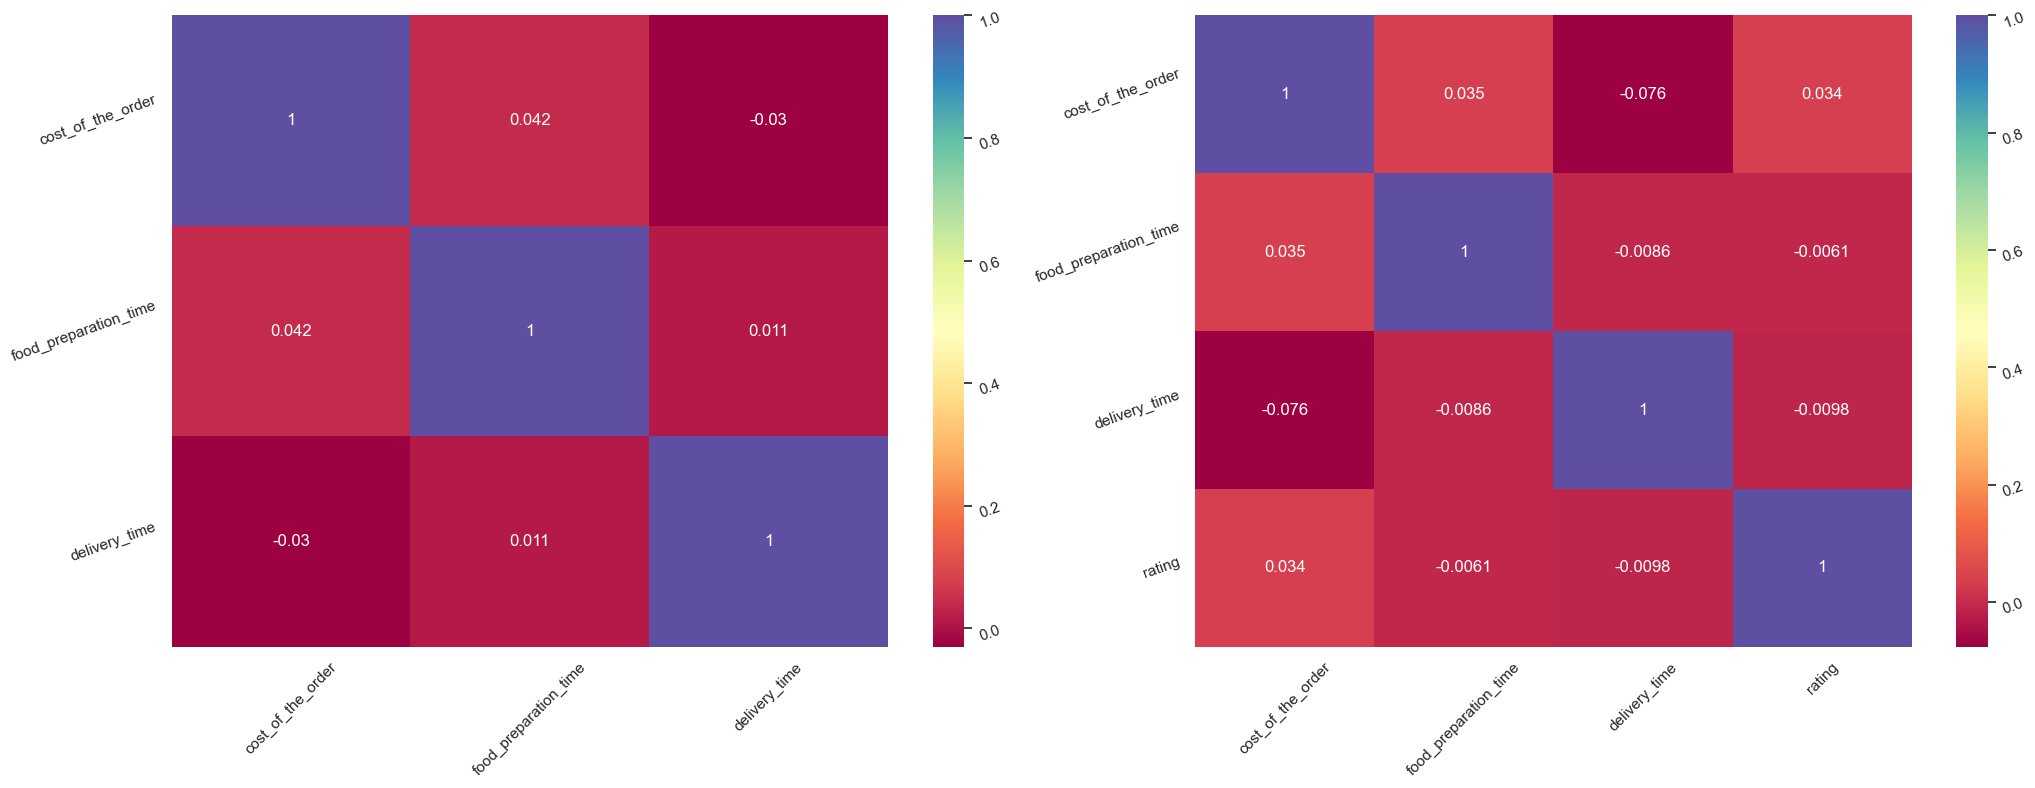

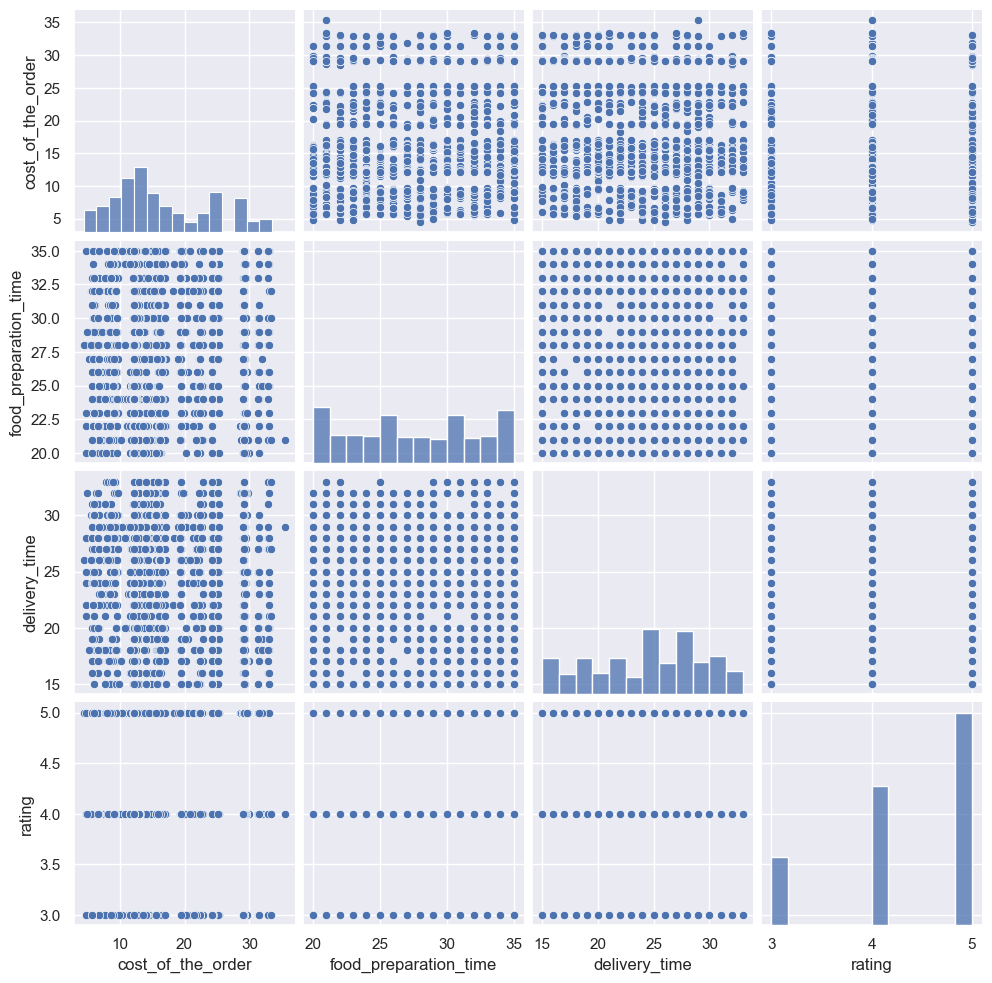

In [1063]:
# Explore correlation of numerical variables
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols=2, figsize=(20, 7))
fig.tight_layout(w_pad=5) # create horizontal spacing in the axes

# Axis 1 - Plot the correlation of numerical variable
numeric_cols = [cost_of_the_order, food_preparation_time, delivery_time] #list of numeric columns to plot
corr = df[numeric_cols].corr() #calculate correlation
sns.heatmap(corr, annot=True, cmap="Spectral", ax=ax1) #draw the heat map

# Axis 2 - Plot the correlation of numerical variables including 'rating'
numeric_cols = [cost_of_the_order, food_preparation_time, delivery_time, rating]
corr = df[df[rating] != "Not given"][numeric_cols].corr() #exclude 'Not given' rating
sns.heatmap(corr, annot=True, cmap="Spectral", ax=ax2)

# Adjust the rotation of x  and y labels to 45 degress to make them readable
for ax in fig.axes:
    for tick in ax.get_xticklabels(): #x labels
        tick.set_rotation(45)
    for tick in ax.get_yticklabels(): # y labels
        tick.set_rotation(20)

# plot a pair plot including rating
df_copy = df[df[rating] != "Not given"].copy() #create dataframe copy after filtering out 'Not given' rating
df_copy[rating] = df_copy[rating].astype(np.int64) #typecast rating to number
sns.pairplot(data=df_copy[numeric_cols]); # plot the pairplot of the numeric columns

In [1064]:
# Explore the restaurants with 'Not given' rating
df[df[rating] == "Not given"][restaurant_name].value_counts()/len(df) *100

restaurant_name
Shake Shack                    4.531085
The Meatball Shop              2.528978
Blue Ribbon Sushi              2.423604
Blue Ribbon Fried Chicken      1.685985
Parm                           1.527924
                                 ...   
The Loop                       0.052687
Schnipper's Quality Kitchen    0.052687
Go! Go! Curry!                 0.052687
Market Table                   0.052687
Amy Ruth's                     0.052687
Name: count, Length: 134, dtype: float64

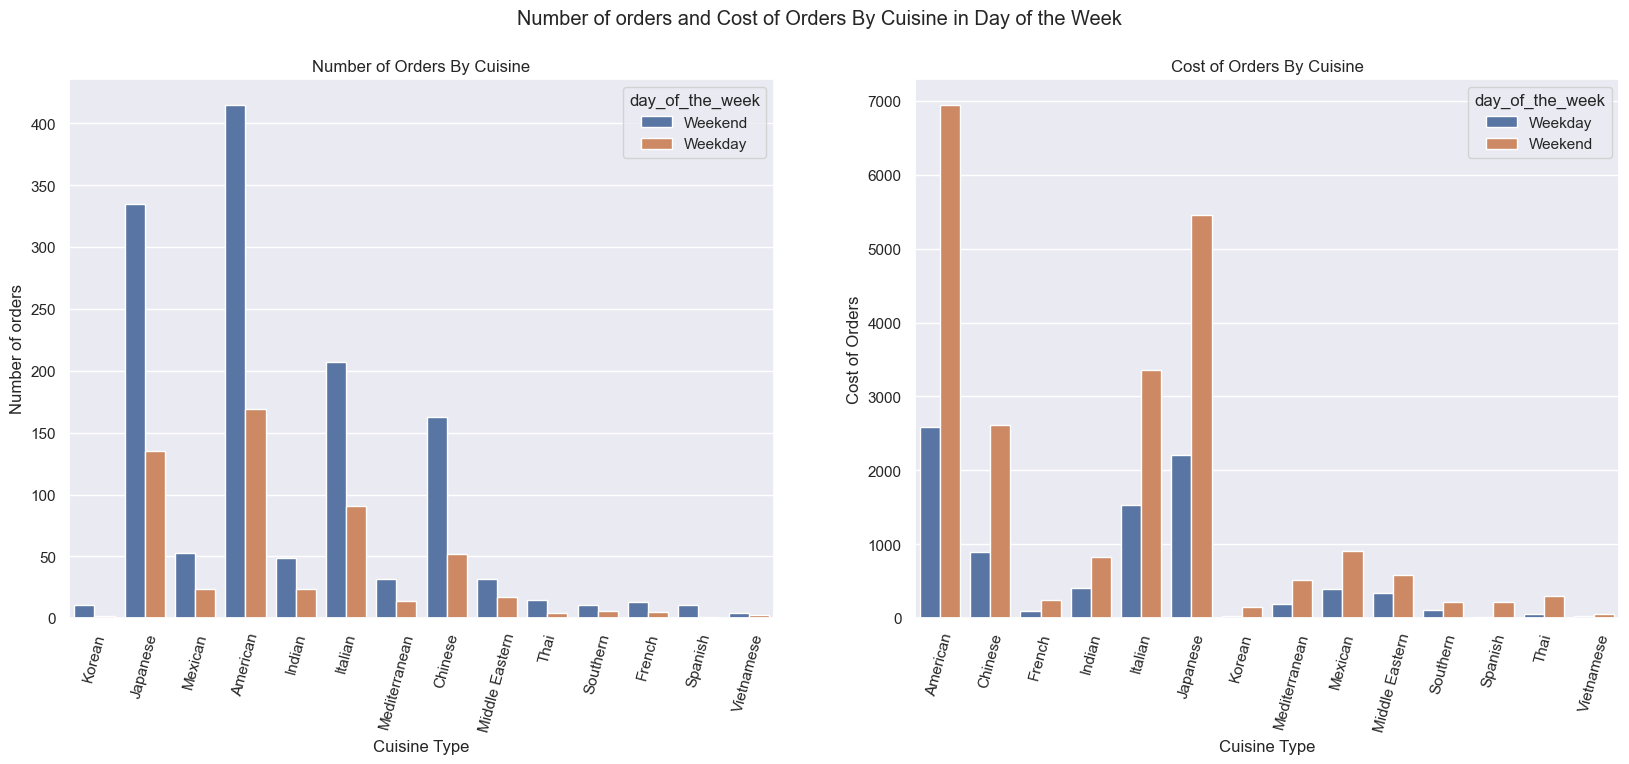

In [1065]:
# Analyse Number of Orders By Day of the Week
# sns.boxplot(data=df, x = day_of_the_week, y=cost_of_the_order, hue=cuisine_type)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
fig.suptitle("Number of orders and Cost of Orders By Cuisine in Day of the Week")
sns.countplot(data=df, x=cuisine_type, hue=day_of_the_week, ax=ax1)
ax1.set_title("Number of Orders By Cuisine")
ax1.set_xlabel("Cuisine Type")
ax1.set_ylabel("Number of orders");


#plot cuisine against total_cost of orders
data = df.groupby([cuisine_type, day_of_the_week])[cost_of_the_order].sum().reset_index()
data
sns.barplot(data=data, x=cuisine_type, y=cost_of_the_order, hue=day_of_the_week, ax=ax2)
ax2.set_title("Cost of Orders By Cuisine")
ax2.set_xlabel("Cuisine Type")
ax2.set_ylabel("Cost of Orders")

for ax in fig.axes:
    for tick in ax.get_xticklabels():
        tick.set_rotation(75)

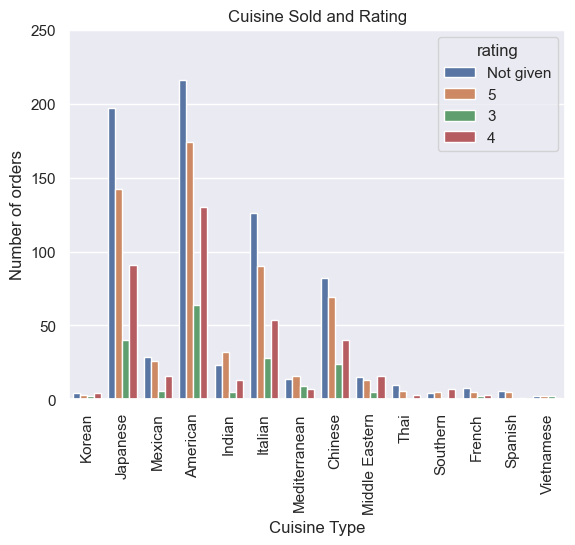

In [1066]:
# Analyse Cuisines and their rating
# sns.boxplot(data=df, x = day_of_the_week, y=cost_of_the_order, hue=cuisine_type)
plt.title("Cuisine Sold and Rating")
sns.countplot(data=df, x=cuisine_type, hue=rating)
plt.xlabel("Cuisine Type")
plt.ylabel("Number of orders")
plt.ylim(0, 250)
plt.xticks(rotation=90);

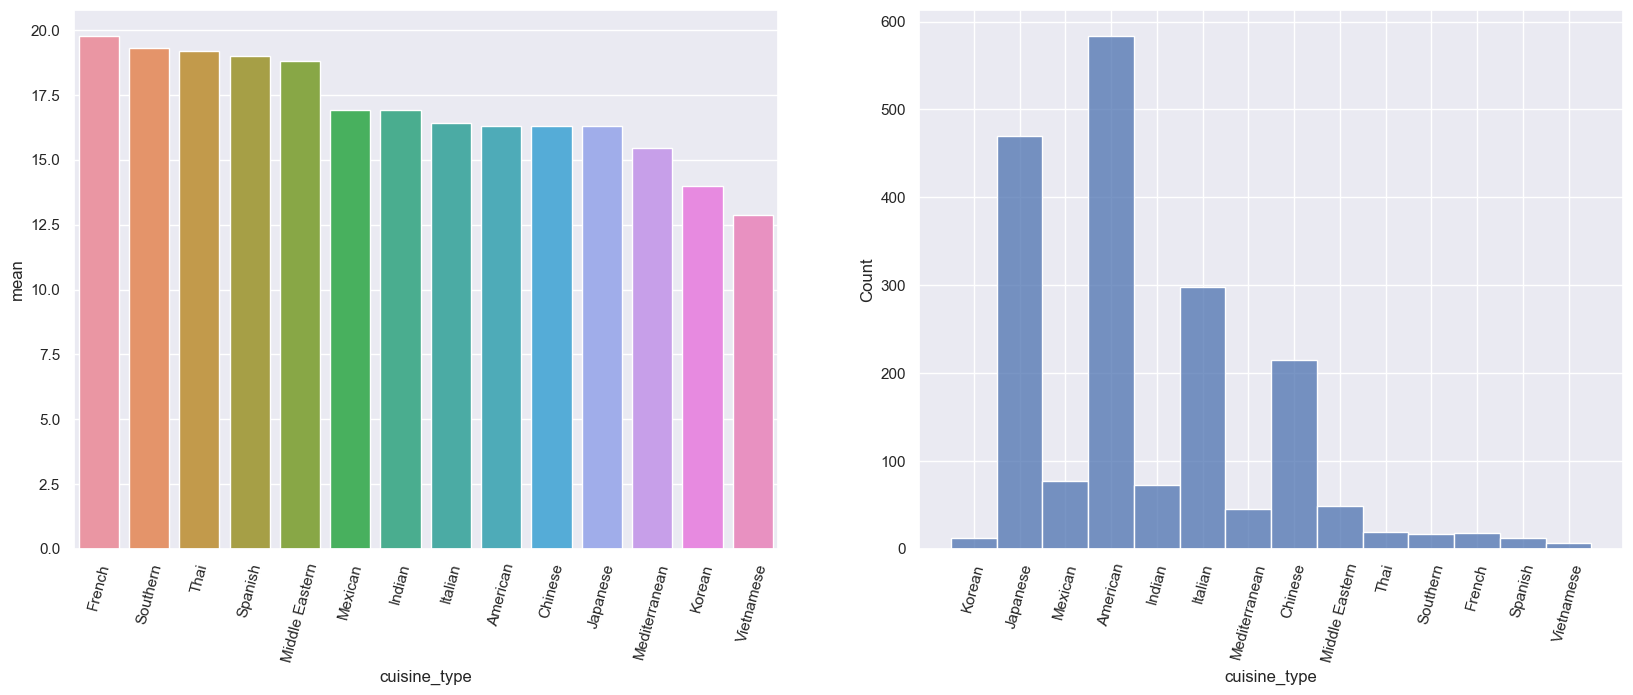

In [1067]:
# Average Price of Cuisines - which impact net revenue and number of orders
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

data = df.groupby([cuisine_type])[cost_of_the_order].agg(['mean'])
data = data.sort_values(by=['mean'], ascending=False).reset_index()
data
sns.barplot(data=data, x=cuisine_type, y="mean", ax=ax1)
for tick in ax1.get_xticklabels():
    tick.set_rotation(75)

sns.histplot(data=df, x=cuisine_type, ax=ax2)
for tick in ax2.get_xticklabels():
    tick.set_rotation(75)

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [1068]:
# Write the code here

rated_orders = df[df[rating] != "Not given"] # filter out unrated orders
rated_orders[rating] = rated_orders[rating].astype(np.int64) # typecast the rating column to integer

#get aggregate count and mean of restaurants
rated_orders_grp = rated_orders.groupby([restaurant_name])[rating].agg(['count', 'mean'])

# get restaurants with rating count > 50 and average rating > 4
qualified_restaurants = rated_orders_grp[(rated_orders_grp['count'] > 50) & (rated_orders_grp['mean'] > 4)] # apply filters
qualified_restaurants.sort_values(by=['count', 'mean'], ascending=False) # sort final result

,count,mean
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
The restaurants who fulfilled the criteria of a rating count of more than 50 and the average rating greater than 4 are:
1. Shake Shack
2. The Meatball Shop
3. Blue Ribbon Sushi
4. Blue Ribbon Fried Chicken

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [1069]:
# Write the code here

# custom function to calculate charges
def charges(cost: float):
    """
    returns the net revenue
    cost: float - cost_of_the_order
    returns a float
    """
    result = 0
    if cost > 20:
        result = cost * 0.25
    elif cost > 5:
        result = cost * 0.15
    return result


# Apply custom function of data series
net_revenue = df[cost_of_the_order].map(charges).sum() #get total net revenue
print(f"The net revenue is USD{net_revenue:,.2f}")

The net revenue is USD6,166.30


#### Observations:
The net revenue is **$6,166.30**.

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [1070]:
# Write the code here
col_time_taken = 'total_time' #set new column name
time_taken = 60 # time taken
df[col_time_taken] = df[food_preparation_time] + df[delivery_time] #Add new column to the dataframe
orders_more_than_60 = df[df[col_time_taken] > time_taken] # filter for orders which require more than 60 mins
perc = (len(orders_more_than_60)/len(df)) * 100 # percentage of orders
print(f"The percentage of orders which take more than {time_taken} minutes to deliver is {perc:.2f}%.")

The percentage of orders which take more than 60 minutes to deliver is 10.54%.


#### Observations:
The percentage of orders which take more 60 minutes to deliver is **10.54%.**

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [1071]:
# Write the code here
df.groupby([day_of_the_week])[delivery_time].mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### Observations:
* It takes less time (6 mins difference) to deliver the orders on weekends than weekdays.
* Unsurprisingly, commuting time on weekends is usually shorter than on weekdays due to less vehicular movements.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)


### Conclusions:
* There are no strong correlations among the cost of orders, food preparation time and delivery time.
* There seems to be a slight inverse correlation between the rating and total time taken to deliver the order from food preparation to final delivery to customer. Customers seem to offer relatively lower rating for longer delivery time.
* There were more orders made during the weekends. This is understandable since most people relax during the weekends and tend to order more food for social events. There is less commuting time during weekends as weekend orders have faster delivery time. The weekend offers better upticks for growth.
* Across all the cuisines, there were more ‘Not given rating’. Customer appear disinclined to give their ratings majority of the times.
* There were more 5 star rating than 4 and 3 signifying there is a relatively high customer satisfaction.
* Although American cuisine sells more, the company based on its business model would make more money from those cuisines with lower orders at the moment like the French cuisine with average cost between USD17.5 - USD20 unlike the American around USD16.

### Recommendations:

* The company should strive toward encouraging more rating from customers as these could drive sales.
* Restaurants should be grouped into some category based on their offerings. This would reduce dimensionality of the restaurants and provide more opportunity for actionable insights.
* The company should drive sales of more cuisines with more favourable margins like the French cuisines since profit margins are correlated to the cost of the cuisines.
* The restaurants should be made aware of how the food preparation time impact the overall experience of the customers.
* There should be a dashboard, integrated into the food app, where the restaurants can view how they are doing with respect to food preparation time versus agreed maximum time.
* Efforts should be focused on weekend sales as it generates ~71% of sales.

---